### ROC Curve 

In [62]:
# Step 1: A function that returns TPR and FPR for a given threshold

def tpr_fpr(y, y_pred, threshold):
    tp,fp, tn, fn = 0, 0, 0, 0
    
    for i in range(len(y)):
        if y_pred[i] >= threshold:
            if y[i] == 1:
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            if y[i] == 0:
                tn = tn + 1
            else:
                fn = fn + 1
                
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    
    return tpr, fpr
      

In [63]:
# Step 2: Get TPR and FPR for all the possible thresholds

# One confusion matrix per threshold

import numpy as np

def build_tpr_fpr_list(y, y_pred):
    thresholds = np.linspace(0,1, 100)  # 0 and 1 included, 100 pts to get better graph
    tpr_list,fpr_list = [], []
    for threshold in thresholds:
        tpr, fpr = tpr_fpr(y, y_pred, threshold)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list


In [64]:
# Create sample y and y_pred 

y = np.random.randint(2, size=(20,)) # 0 and 1, 2 is excluded
y_pred = random.random(size=(20,))

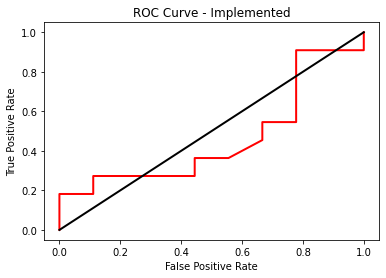

In [65]:
# Step 3: Plot ROC Curve using own implementation 

tpr_list, fpr_list = build_tpr_fpr_list(y, y_pred)

import matplotlib.pyplot as plt

plt.plot(fpr_list,tpr_list, 'r', lw=2) # x-axis is fpr 
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Implemented')
plt.show()



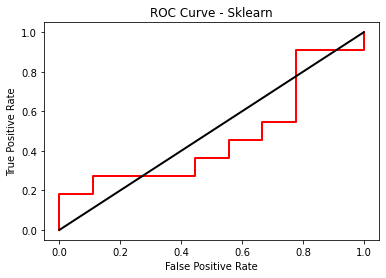

In [66]:
# Plot ROC Curve using sklearn implementation

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_pred)

plt.plot(fpr,tpr, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Sklearn')
plt.show()

### ROC AUC Score

Use Trapezoidal Rule: The area under curve can be approximated by several trapezoids
Area of trapezoid = ((length of side 1 + length of side 2)/ 2) * width 

https://en.wikipedia.org/wiki/File:Composite_trapezoidal_rule_illustration.png

In [78]:
np.trapz([1, 2, 3], x=[4, 6, 8])  # 1st arg: list of y-axis points and x = list of x-axis points 

8.0

In [79]:
# Using a decreasing x corresponds to integrating in reverse:
np.trapz([1, 2, 3], x=[8, 6, 4]) 

-8.0

In [81]:
# IMP: fpr_array is in decreasing order hence '-' sign to auc calculation

# Convert python list to numpy array for both tpr_list and fpr_list
tpr_array = np.array(tpr_list)
fpr_array = np.array(fpr_list)
auc = -(np.trapz(tpr_list,fpr_list))
print('Area under curve={}'.format(auc))

Area under curve=0.4595959595959596


In [77]:
# Compare with sklearn 
from sklearn.metrics import roc_auc_score
roc_auc_score(y,y_pred)

0.4646464646464646

### Entropy

Given a list of labels (label vector)

In [102]:
def entropy(labels):
    values, counts = np.unique(labels, return_counts = True) # values and counts will be vectors
    probs = counts/len(labels) # counts vector will be divided by len of labels element-wise
    entropy = np.sum(probs * np.log2(1/probs)) # log base 2 can be replaced by e, original concept was for bits and bits can only be in 2 states i.e. on or off 
    return entropy 

# log base 2 and log base e are only constant factor away from each other so it does not matter much i.e. just a scaling factor
# note -> np.log() means to the base e 

In [104]:
labels = np.random.randint(2, size=(20,))
entropy(labels)

# log base and number of classes should be same to have entropy value <= 1

0.9927744539878084

### Softmax

In [107]:
def softmax(values):
    exp_values = np.exp(values) # Computing element wise exponential value
    exp_values_sum = np.sum(exp_values) # Sum of exponential values
    return exp_values/exp_values_sum

In [108]:
values = np.random.randint(10, size=(10,))
softmax(values)

array([1.34532633e-04, 9.94069173e-04, 1.99664131e-02, 1.99664131e-02,
       7.34523289e-03, 4.01036127e-01, 4.01036127e-01, 1.47532946e-01,
       9.94069173e-04, 9.94069173e-04])

In [109]:
np.sum(softmax(values))
# should be 1

1.0000000000000002

### Cross-entropy

In [ ]:
Given true label vector and (softmax) predicted prob vector

In [134]:
def cross_entropy(y, y_pred):
    return np.sum(y * np.log(1/y_pred))

In [135]:
y = np.random.randint(2, size=(10,))
y_pred = np.random.random(size=(10,))

cross_entropy(y, y_pred)

3.970062333919456

### RMSE

In [126]:
import numpy as np
def root_mean_squared_error(y_pred, y):

    diff = y_pred - y
    differences_squared = diff ** 2 # np.sum() not needed as .mean() will do it
    mean_diff_squared = differences_squared.mean()
    rmse = np.sqrt(mean_diff_squared)
    return rmse

In [127]:
y = np.array([1.1,2,1.7])
y_pred = np.array([1,1.7,1.5])

root_mean_squared_error(y_pred, y)

0.21602468994692867

In [128]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y, y_pred))

0.21602468994692867

### NDCG

In [ ]:
Given one list of relevance scores
https://en.wikipedia.org/wiki/Discounted_cumulative_gain

In [197]:
def ndcg(rel_scores, k):
    ideal_order = np.flip(np.sort(rel_scores)) # sort relevance scores in descending order
    ideal_dcg = 0
    for rank, relevance in enumerate(ideal_order[:k]):
        ideal_dcg = ideal_dcg + ((relevance)/ (np.log2(rank + 2))) # since rank starts at 0, use + 2
    print("ideal_dcg = {}".format(ideal_dcg))
    
    dcg = 0
    for rank, relevance in enumerate(rel_scores[:k]):
        dcg = dcg + ((relevance)/ (np.log2(rank + 2))) # since rank starts at 0, use + 2
    print("dcg = {}".format(dcg))
   
    # when no relevant docs in the list, NDCG is set to 0 to avoid division by zero
    if ideal_dcg != 0: 
        return dcg/ideal_dcg
    else:
        return 0.0 
    

In [198]:
rel_scores = [3,2,3,0,1,2]
ndcg(rel_scores, len(rel_scores))

ideal_dcg = 7.1409951840957
dcg = 6.861126688593502


0.9608081943360617

In [ ]:
Given two lists of n items:  1) predicted relevance scores 2) (corresponding) true relevance scores  [Main implementation as in sklearn]

In [199]:
# Usually, for dcg and idcg this formula can be used -> ((2 ** relevance - 1)/ (np.log2(rank + 2))) [rank+2 since rank starts at 0]
# but to maintain compatability with sklearn ndcg score, below formula is used

def ndcg(true_rel_score, pred_rel_score, k):
    ideal_order = np.flip(np.sort(true_rel_score)) # sort true relevance score in descending order
    ideal_dcg = 0
    for rank, relevance in enumerate(ideal_order[:k]):
        ideal_dcg = ideal_dcg + ((relevance)/ (np.log2(rank + 2))) # since rank starts at 0, use + 2
    print("ideal_dcg = {}".format(ideal_dcg))
        
    dcg = 0
    pred_indices = np.flip(np.argsort(pred_rel_score)) # sort indexes in descending order using predicted relevance score
    pred_indices_true_rel_score = [true_rel_score[i] for i in pred_indices] # get true relevance score for the above indexes    
    for rank, relevance in enumerate(pred_indices_true_rel_score[:k]):
        dcg = dcg + ((relevance)/ (np.log2(rank + 2))) # since rank starts at 0, use + 2    
    print("dcg = {}".format(dcg))
        
    # when no relevant docs in the list, NDCG is set to 0 to avoid division by zero
    if ideal_dcg != 0: 
        return dcg/ideal_dcg
    else:
        return 0.0  


In [200]:
true_relevance = np.asarray([10, 0, 0, 1, 5])
scores = np.asarray([.1, .2, .3, 4, 70])
ndcg(true_relevance, scores, len(scores))

ideal_dcg = 13.654648767857287
dcg = 9.499457825916874


0.6956940443813076

In [201]:
from sklearn.metrics import ndcg_score
true_relevance = np.asarray([[10, 0, 0, 1, 5]])
scores = np.asarray([[.1, .2, .3, 4, 70]])
ndcg_score(true_relevance, scores)

0.6956940443813076

### Average Precision (AP) or Area Under PR Curve

In [ ]:
Average precision is one way of calculating area under P-R curve (another method is trapezoidal rule used to approximate integrals)

In [359]:
# Step 1: A function that returns Precision and Recall for a given threshold

def precision_recall(y, y_pred, threshold):
    tp,fp, tn, fn = 0, 0, 0, 0
    
    for i in range(len(y)):
        if y_pred[i] >= threshold:
            if y[i] == 1:
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            if y[i] == 0:
                tn = tn + 1
            else:
                fn = fn + 1
                
    try:   
        precision = tp/(tp+fp) # imp: denominator in brackets for correct order of operation
    except: # to avoid division by zero
        precision = 1
        
    try:
        recall = tp/(tp+fn)
    except: # to avoid division by zero
        recall = 1
    
    return precision, recall

# Recall list starts at 1 and precision list ends at 1 (try-catch block)

In [360]:
# Step 2: Get Precision and Recall for all the possible thresholds

# One confusion matrix per threshold

import numpy as np

def build_precision_recall_list(y, y_pred):
    thresholds = np.linspace(0, 1, 20)  
    precision_list,recall_list = [], []
    for threshold in thresholds:
        precision, recall = precision_recall(y, y_pred, threshold)
        precision_list.append(precision)
        recall_list.append(recall)
    return precision_list, recall_list, thresholds


In [361]:
# Step 3: Calculate AP / Area Under PR Curve

def calculate_AP(y, y_pred):
    precision_list, recall_list, thresholds = build_precision_recall_list(y, y_pred)
    print("Recall List = {}\n".format(recall_list))
    print("Precision List = {}\n".format(precision_list))
    print("Thresholds = {}\n".format(thresholds))
    
    # For performing vectorization operation, convert list to nd array
    precision_array = np.array(precision_list)
    recall_array = np.array(recall_list)
    AP = np.sum((recall_array[:-1] - recall_array[1:]) * precision_array[:-1])  # Note this vectorized operation
    return AP
    
  

In [362]:
y = np.random.randint(2, size=(1000,)) # 0 and 1, 2 is excluded
y_pred = random.random(size=(1000,))
calculate_AP(y, y_pred)

# more number of points in y and y_pred makes implemented AP come closer to sklearn's AP

Recall List = [1.0, 0.9409368635437881, 0.8778004073319755, 0.814663951120163, 0.7657841140529531, 0.7352342158859471, 0.6761710794297352, 0.6191446028513238, 0.5682281059063137, 0.49490835030549896, 0.4460285132382892, 0.39307535641547864, 0.35845213849287166, 0.29938900203665986, 0.24643584521384929, 0.18126272912423624, 0.12627291242362526, 0.07331975560081466, 0.038696537678207736, 0.0]

Precision List = [0.491, 0.4868282402528978, 0.49144811858608894, 0.48721071863581, 0.4876783398184176, 0.4931693989071038, 0.48751835535976507, 0.48484848484848486, 0.4826989619377163, 0.4700193423597679, 0.47300215982721383, 0.4684466019417476, 0.48753462603878117, 0.49, 0.4820717131474104, 0.4472361809045226, 0.4217687074829932, 0.3829787234042553, 0.40425531914893614, 1]

Thresholds = [0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 

0.47271764757549734

In [363]:
from sklearn.metrics import average_precision_score
print(average_precision_score(y, y_pred))

0.47571861967672147


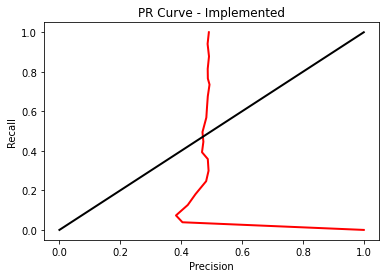

In [365]:
# Plot PR Curve using own implementation 

import matplotlib.pyplot as plt

precision_list, recall_list, thresholds = build_precision_recall_list(y, y_pred)

plt.plot(precision_list,recall_list, 'r', lw=2) # x-axis is precision
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('PR Curve - Implemented')
plt.show()

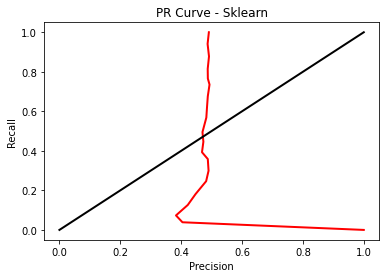

In [366]:
# Plot PR Curve using sklearn

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y, y_pred)
plt.plot(precision_list,recall_list, 'r', lw=2) # x-axis is precision
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('PR Curve - Sklearn')
plt.show()

### Reservoir Sampling

In [ ]:
class Reservoir:
    def __init__(self, size):
        self.size = size
        self.reservoir = []
        self.count = -1
        
    def try_add(self, value):
        self.count = self.count + 1
        
        if self.count < self.size:
            self.reservoir.append(value)
            return True
        else:
            insertion_idx = random.randint(0, self.count) # in python randint, both start and end are included unlike numpy
            if insertion_idx < self.size:
                self.reservoir[insertion_idx] = value
                return True
            else:
                return False

### Making biased coin fair/unbiased

### Dot Product of Sparse Vectors

In [ ]:
Given two sparse vectors, compute their dot product.

Implement class SparseVector:

SparseVector(nums) Initializes the object with the vector nums
dotProduct(vec) Compute the dot product between the instance of SparseVector and vec
A sparse vector is a vector that has mostly zero values, you should store the sparse vector efficiently and compute the dot product between two SparseVector.

Follow up: What if only one of the vectors is sparse?

In [ ]:
# Solution 1: List of List (data structure)  + Binary Search (lookup)

class SparseVector:
    def __init__(self, nums: List[int]):
        # Create a sparse list (each element being a list of index, value)    
        self.sparse_list = []
        for i in range(len(nums)):
            if nums[i] != 0:
                self.sparse_list.append([i, nums[i]])
        
    # Return the dotProduct of two sparse vectors
    def dotProduct(self, vec: 'SparseVector') -> int:
        # In python, = just creates a new variable that shares the reference of the original object
        sparse_list1 = self.sparse_list  
        sparse_list2 = vec.sparse_list

        res = 0

        # The shorter list should be iterated on bcz it will save iteration cycles compared to longer list
        if len(sparse_list1) > len(sparse_list2):
            sparse_list1, sparse_list2 = sparse_list2, sparse_list1
        for i in range(len(sparse_list1)):
            left = 0
            right = len(sparse_list2) - 1
            # Binary search to look up index in the shorter list 
            # Note both lists are sorted by index as that's how they were built
            # Hashmap solution has O(1) lookup so no binary search needed 
            while left <= right:
                mid = (left + right) // 2
                if sparse_list2[mid][0] == sparse_list1[i][0]:
                    res += sparse_list2[mid][1] * sparse_list1[i][1]
                    break
                if sparse_list2[mid][0] < sparse_list1[i][0]:
                    left = mid + 1
                else:
                    right = mid - 1
        return res
    
# Time Complexity of __init__():O(L1 + L2) where L1, L2 = length of first and second list resp.
# Space Complexity of __init(): O(l1 + l2) where l1,l2 = length of longer and shorter sparse list resp

# Time Complexity of dotProduct(): l2 * log (l1) [binary search]
# Space Complexity of dotProduct(): O(1) [binary search]

In [ ]:
# Solution 2: Hashmap (data structure): Lookup is already O(1) hence binary search is not needed
# Note: some interviewers do not prefer hashmap based solution bcz of practical restrictions in creating such a big hashmap

class SparseVector:
    def __init__(self, nums: List[int]):
        # Create hashmap of index:value
        self.d = {i: x for i, x in enumerate(nums) if x}

    # Iterate on shorter vector to save iteration cycles compared to longer vector
    # dict.get(key,0) returns 0 when key is not found
    def dotProduct(self, vec: 'SparseVector') -> int:
        dot_product = 0
        if len(self.d) <= len(vec.d):
            for key in self.d:
                dot_product = dot_product + self.d[key]*vec.d.get(key, 0)
        else:
            for key in vec.d:
                dot_product = dot_product + vec.d[key]*self.d.get(key, 0)

        return dot_product
    
# Time Complexity of __init__():O(L1 + L2) where L1, L2 = length of first and second list resp.
# Space Complexity of __init(): O(l1 + l2) where l1,l2 = length of longer and shorter sparse list resp

# Time Complexity of dotProduct(): l2 (hashmap lookup is O(1))
# Space Complexity of dotProduct(): O(1) 

### Sparse Matrix Multiplication

In [ ]:
# 3 loop solution is not acceptable by companies

# Create a hashmap with key as tuple of row, col index and value as matrix value from non-sparse elements

class Solution:
    def multiply(self, mat1: List[List[int]], mat2: List[List[int]]) -> List[List[int]]:

        sparse_a = self.get_nonzero_cells_dict(mat1)
        sparse_b = self.get_nonzero_cells_dict(mat2)

        matrix_result = [[0] * len(mat2[0]) for _ in range(len(mat1))]
               
        # can optimize outer loop to be shorter sparse matrix
        for i,k in sparse_a.keys(): # instead of two loops, one loop does the job
            for j in range(len(mat2[0])): # imp: columns in mat2, not in sparse version
                if (k,j) in sparse_b.keys():
                    matrix_result[i][j] = matrix_result[i][j] + sparse_a[(i,k)] * sparse_b[(k,j)]

        return matrix_result 

    def get_nonzero_cells_dict(self, matrix):
        d = {}
        for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                if matrix[i][j] != 0:
                    d[(i,j)] = matrix[i][j]
        return d    

# Time Complexity: O(mk + kn + M) where M = total number of multiplications of non-zero pairs
# Space Complexity: O(c1 + c2) where c1, c2 = number of non-zero values in matrix 1 and matrix 2 

### Randomly shuffle an array

In [ ]:
def shuffle(arr):
    for i in range(len(arr)):
        j = random.randint(i, len(arr)-1)
        temp = arr[j]
        arr[j] = arr[i]
        arr[i] = temp

### Median of Data Stream

In [ ]:
import heapq
class MedianFinder:

    def __init__(self):
        """
        initialize your data structure here.
        """
        self.small = []
        self.large = []

    def addNum(self, num: int) -> None:
        # when self.small is empty
        if len(self.small) == 0:
            heapq.heappush(self.small, -num) # max heap hence push -num
            return
        
        # if incoming num is smaller than self.small[0] max heap 
        if num <= -self.small[0]:
            heapq.heappush(self.small, -num)
        else:
            heapq.heappush(self.large, num)
        
        # balancing
        if len(self.small) - len(self.large) == 2:
            heapq.heappush(self.large, -heapq.heappop(self.small))
        elif len(self.small) - len(self.large) == -2:
            heapq.heappush(self.small, -heapq.heappop(self.large))
        

    def findMedian(self) -> float:
        if len(self.small) == len(self.large):
            return (self.large[0] + (- self.small[0]))/2.0
        if len(self.small) > len(self.large):
            return -self.small[0]
        else:
            return self.large[0]

        
# Time Complexity = O(5 log n) + O(1) = O(log n)
# At worst, there are three heap insertions and two heap deletions from the top. Each of these takes about O(log ⁡n)time.
# Finding the median takes constant O(1) time since the tops of heaps are directly accessible.

# Space Complexity = O(n) linear space to hold input in containers